Connect to your google drive in order to use files from database:

In [4]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


Loading the Modules for the Code, just run this part:

In [5]:
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble
import pandas, xgboost, numpy, textblob, string
from keras.preprocessing import text, sequence
from keras import layers, models, optimizers
from nltk.stem.porter import *
import matplotlib.pyplot as plt

Getting the file from Google Drive, might have to change file location, You can change what files are in the folder to look at certain timeframes:

In [6]:
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir("/content/drive/MyDrive/Stage2Clean") if isfile(join("/content/drive/MyDrive/Stage2Clean", f))]
fileOpen = "/content/drive/MyDrive/Stage2Clean/"
temp = fileOpen + onlyfiles[0] 
fileLoc = pd.read_csv(temp)
allFiles = fileLoc
for i in range(1,len(onlyfiles)):
  temp = fileOpen + onlyfiles[i] 
  fileLoc = pd.read_csv(temp)
  allFiles = allFiles.append(fileLoc)

All the columns of the file:

In [7]:
allFiles.dtypes

incident_id                        int64
date                              object
state                             object
city_or_county                    object
address                           object
n_killed                           int64
n_injured                          int64
incident_url                      object
source_url                        object
incident_url_fields_missing         bool
congressional_district           float64
gun_stolen                        object
gun_type                          object
incident_characteristics          object
latitude                         float64
location_description              object
longitude                        float64
n_guns_involved                  float64
notes                             object
participant_age                   object
participant_age_group             object
participant_gender                object
participant_name                  object
participant_relationship          object
participant_stat

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

Enter type of area you want to look at:

In [8]:
FindFrequency = "state"

Enter data you want to find here (Int Fields):

In [9]:
IntToFind = "n_killed"

Enter data you want to find here (Object Fields):

In [10]:
StringToFind = "tidy_incident_characteristics"

Get all non null values away from the dataframe.

In [11]:
not_null = allFiles[allFiles[StringToFind].notnull()]

In [12]:
not_null_2 = allFiles[allFiles[IntToFind].notnull()]

**For finding on Number Columns**

---






Overall IntToFind with FindFrequency Values

In [13]:
totalByFindFreq = {}
for i in not_null_2[FindFrequency]:
  if i in totalByFindFreq:
      totalByFindFreq[i] += 1
  else:
    totalByFindFreq[i] = 1
for key, value in totalByFindFreq.items():
    print(f"{key}: {value}")

Tennessee: 7626
Oklahoma: 3455
California: 16306
Ohio: 10244
Pennsylvania: 8929
Illinois: 17556
Texas: 13577
Florida: 15029
Kentucky: 4157
Indiana: 5852
New Jersey: 5387
Virginia: 5949
Alabama: 5471
Wisconsin: 4787
Colorado: 3201
Michigan: 6136
District of Columbia: 3195
West Virginia: 1575
Missouri: 6631
South Carolina: 6939
Arkansas: 2842
Washington: 3434
Georgia: 8925
New York: 9712
Nevada: 1952
Mississippi: 3599
Oregon: 2286
Arizona: 2328
North Carolina: 8739
Maryland: 5798
Louisiana: 8103
Alaska: 1349
Massachusetts: 5981
Maine: 907
Rhode Island: 895
New Mexico: 1645
Iowa: 2517
Montana: 638
South Dakota: 544
Vermont: 472
Delaware: 1685
Kansas: 2145
Utah: 1072
Connecticut: 3067
Nebraska: 1651
Minnesota: 2408
Idaho: 661
New Hampshire: 964
North Dakota: 573
Wyoming: 494
Hawaii: 289


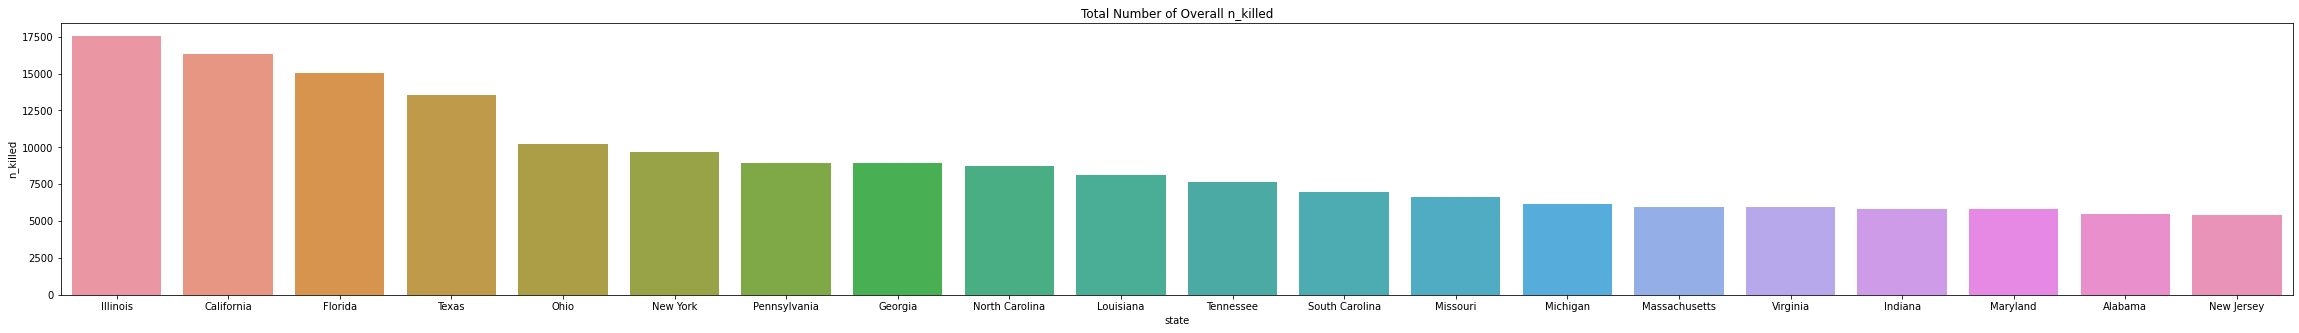

In [14]:
d = pd.DataFrame({FindFrequency: list(totalByFindFreq.keys()),IntToFind: list(totalByFindFreq.values())})  
d = d.nlargest(columns=IntToFind, n = 20) 
plt.figure(figsize=(40,5))
ax = sns.barplot(data=d, x= FindFrequency, y = IntToFind)
ax.set(ylabel = IntToFind)
ax.set_title("Total Number of Overall " + IntToFind)
plt.show()

Find what the unique values in the int columns are:

In [15]:
unique2 = {}
num = 0
for i in not_null_2[IntToFind]:
    if i in unique2:
      unique2[i] += 1
    else:
      unique2[i] = 1
    num += 1
final_num = num
for key, value in unique2.items():
    print(f"{key}: {value}")

1: 48436
0: 185835
2: 4604
3: 595
4: 139
5: 41
9: 3
6: 11
8: 5
17: 1
27: 1
7: 2
16: 1
50: 1
11: 1
10: 1


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

Enter Number on List to sort:

In [16]:
NumberInPlace = 1

Frequency of that number in the columns based on FindFrequency Column

In [17]:
num_find = []
for i in not_null_2[IntToFind]:
  num_find.append(i)

num_count = {}
num = 0
for i in not_null_2[FindFrequency]:
  if NumberInPlace == num_find[num]:
    if i in num_count:
      num_count[i] += 1
    else:
      num_count[i] = 1
  num += 1
for key, value in num_count.items():
    print(f"{key}: {value}")

Tennessee: 1509
Oklahoma: 742
California: 4490
Illinois: 2955
Alabama: 1549
Virginia: 1163
Pennsylvania: 1900
District of Columbia: 410
Florida: 2950
Missouri: 1748
Arkansas: 610
Washington: 626
Texas: 3801
Michigan: 1252
Georgia: 1955
Ohio: 2016
New York: 1440
South Carolina: 1334
Nevada: 630
Indiana: 1276
Wisconsin: 702
New Jersey: 1000
North Carolina: 1838
Louisiana: 1804
Montana: 99
Maryland: 1433
South Dakota: 65
Arizona: 819
Oregon: 327
Colorado: 620
West Virginia: 264
Mississippi: 971
Nebraska: 173
Minnesota: 353
Kansas: 419
Kentucky: 795
Alaska: 212
New Hampshire: 69
North Dakota: 47
New Mexico: 376
Hawaii: 50
Massachusetts: 416
Connecticut: 289
Utah: 197
Rhode Island: 53
Maine: 69
Delaware: 190
Idaho: 116
Iowa: 222
Wyoming: 53
Vermont: 39


In [18]:
print(sum(num_count.values()))

48436


Word Cloud Of unique incidents using Number

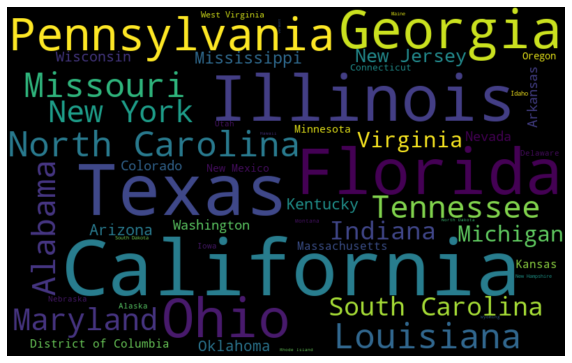

In [19]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110, max_words=51).generate_from_frequencies(num_count)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Graph of Most common Unique incidents using the number

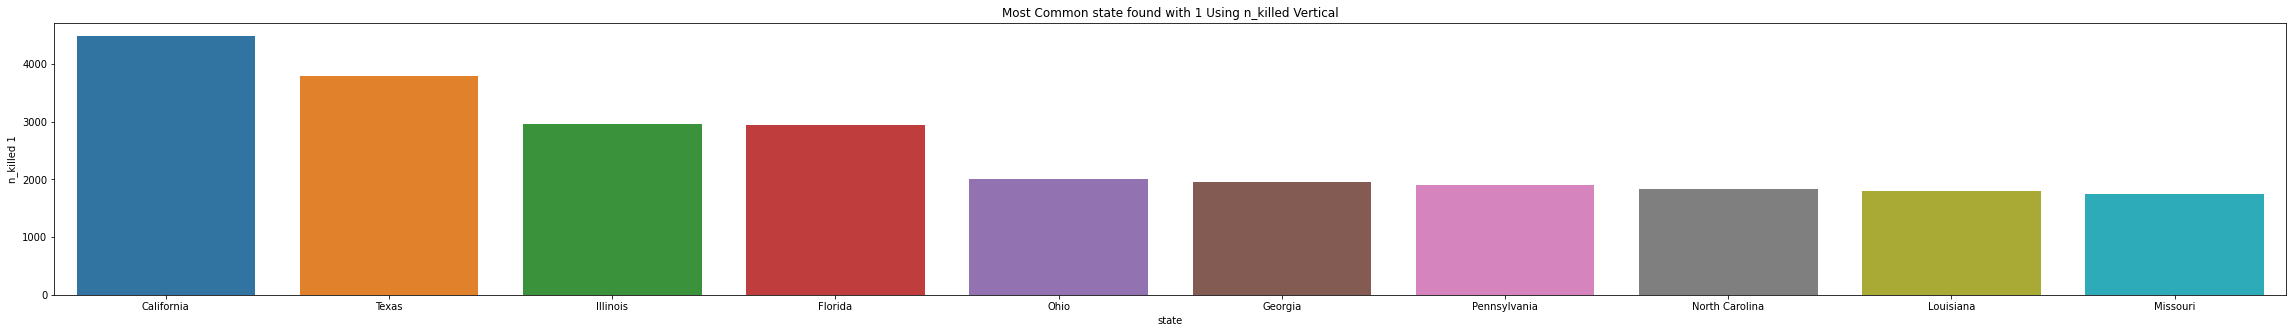

In [20]:
d = pd.DataFrame({FindFrequency: list(num_count.keys()),IntToFind: list(num_count.values())})  
d = d.nlargest(columns=IntToFind, n = 10) 
plt.figure(figsize=(40,5))
ax = sns.barplot(data=d, x= FindFrequency, y = IntToFind)
ax.set(ylabel = IntToFind + " " + str(NumberInPlace))
ax.set_title("Most Common " + FindFrequency +" found with " + str(NumberInPlace) + " Using " + IntToFind + " Vertical")
plt.show()

Finding Percentage of how many this number represented in the total number of violent crimes

In [21]:
totalByFindFreq = {}
for i in not_null_2[FindFrequency]:
  if i in totalByFindFreq:
      totalByFindFreq[i] += 1
  else:
    totalByFindFreq[i] = 1
average = {}
num = 0
for i in not_null_2[FindFrequency]:
  if i in average:
    if NumberInPlace == num_find[num]:
      average[i] += 1
  else:
    average[i] = 1
  num += 1
tableForAverage = {k: str(round(average[k] / totalByFindFreq[k],5)) for k in num_count if k in average}
df = pd.DataFrame(tableForAverage.items(), columns=[FindFrequency, "Total Percentage of " + str(NumberInPlace) + " " + IntToFind + " In Total Crime"])
df.sort_values(by=["Total Percentage of " + str(NumberInPlace) + " " + IntToFind +" In Total Crime"],ascending=True)

,state,Total Percentage of 1 n_killed In Total Crime
44,Rhode Island,0.06034
41,Massachusetts,0.06972
37,New Hampshire,0.07158
45,Maine,0.07718
38,North Dakota,0.08202
50,Vermont,0.08475
48,Iowa,0.0886
42,Connecticut,0.09455
32,Nebraska,0.10478
49,Wyoming,0.10931


**For finding on Object Columns**



---








Overall StringToFind with FindFrequency Values

In [22]:
totalByFindFreq = {}
for i in not_null[FindFrequency]:
  if i in totalByFindFreq:
      totalByFindFreq[i] += 1
  else:
    totalByFindFreq[i] = 1
for key, value in totalByFindFreq.items():
    print(f"{key}: {value}")

Tennessee: 7617
Oklahoma: 3450
California: 16289
Ohio: 10225
Pennsylvania: 8925
Illinois: 17506
Texas: 13539
Florida: 15020
Kentucky: 4148
Indiana: 5835
New Jersey: 5383
Virginia: 5932
Alabama: 5470
Wisconsin: 4778
Colorado: 3199
Michigan: 6113
District of Columbia: 3191
West Virginia: 1575
Missouri: 6628
South Carolina: 6933
Arkansas: 2841
Washington: 3433
Georgia: 8922
New York: 9703
Nevada: 1948
Mississippi: 3597
Oregon: 2286
Arizona: 2325
North Carolina: 8732
Maryland: 5792
Louisiana: 8083
Alaska: 1349
Massachusetts: 5976
Maine: 907
Rhode Island: 895
New Mexico: 1642
Iowa: 2511
Montana: 638
South Dakota: 543
Vermont: 472
Delaware: 1685
Kansas: 2145
Utah: 1072
Connecticut: 3064
Nebraska: 1651
Minnesota: 2405
Idaho: 661
New Hampshire: 964
North Dakota: 572
Wyoming: 493
Hawaii: 288


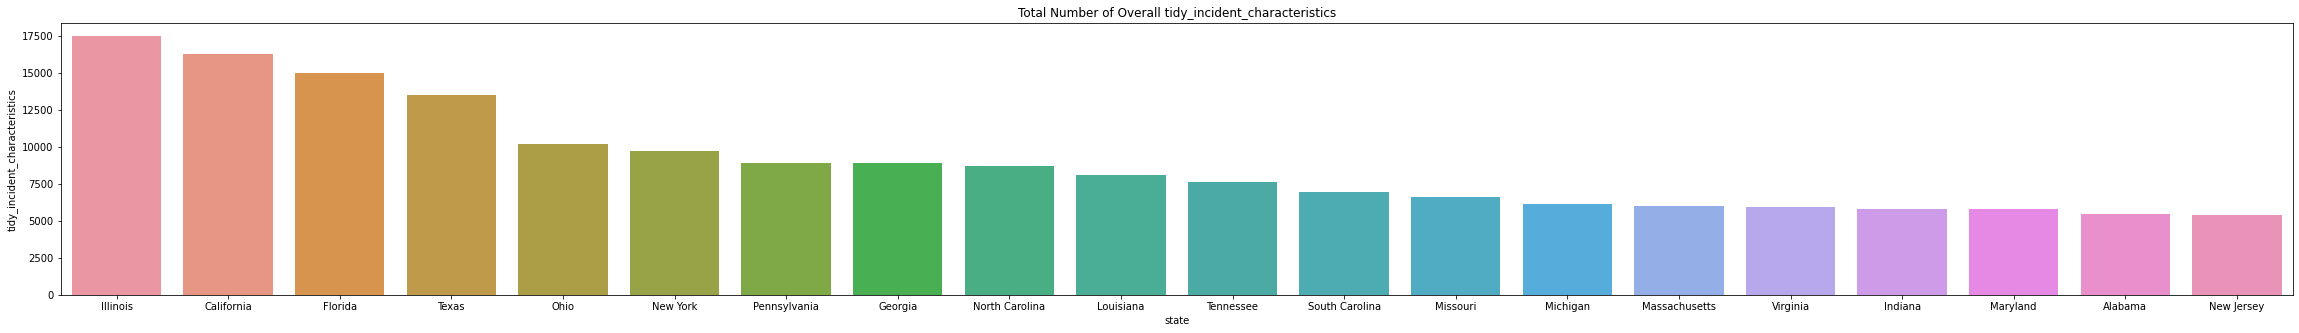

In [23]:
d = pd.DataFrame({FindFrequency: list(totalByFindFreq.keys()),StringToFind: list(totalByFindFreq.values())})  
d = d.nlargest(columns=StringToFind, n = 20) 
plt.figure(figsize=(40,5))
ax = sns.barplot(data=d, x= FindFrequency, y = StringToFind)
ax.set(ylabel = StringToFind)
ax.set_title("Total Number of Overall " + StringToFind)
plt.show()

Find what the unique values in the object columns are:

In [24]:
unique = {}
for i in not_null[StringToFind]:
  for j in i.split():
    if j in unique:
      unique[j] += 1
    else:
      unique[j] = 1
for key, value in unique.items():
    print(f"{key}: {value}")

shot: 198979
dead: 53409
murder: 56456
accident: 75955
suicid: 67202
bar: 4590
club: 4590
incid: 80855
in: 4590
or: 54245
around: 4590
establish: 5982
wound: 93926
injur: 100639
brandish: 19017
flourish: 19017
open: 19017
carri: 20205
lost: 19017
found: 71645
shoot: 83075
injuri: 72174
child: 5702
involv: 68197
pick: 607
up: 607
fire: 46600
gun: 74237
arm: 19723
robberi: 20320
with: 23174
death: 29730
and: 24106
evid: 21765
of: 73576
dgu: 19723
possess: 48028
s: 44736
dure: 38423
commiss: 30863
other: 30863
crime: 37000
home: 21626
invas: 21626
resid: 3916
gang: 5677
neglig: 6422
discharg: 6652
offic: 39969
anim: 723
kill: 9645
stolen: 16252
from: 6546
owner: 6313
domest: 10841
violenc: 10854
mass: 1735
victim: 10469
exclud: 1735
the: 8723
subject: 21886
suspect: 21886
perpetr: 22450
one: 2204
locat: 2133
defens: 16935
use: 16935
stop: 2732
occur: 4127
stand: 1392
your: 1392
ground: 1392
castl: 1392
doctrin: 1392
No: 42786
non: 47887
law: 2285
enforc: 2285
assault: 2052
weapon: 7308
AR

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

Enter what keyword to search for object Field

In [25]:
keyWordInPlace = "kill"

Putting values in a dictionary on frequency of word used in a case, only finds one, doesn't count multiple values in a single case.

In [43]:
new_find = []
for i in not_null[StringToFind]:
  new_find.append(i.split())

elements_count = {}
num = 0
for i in not_null[FindFrequency]:
  if i in elements_count:
    for j in new_find[num]:
      if j == keyWordInPlace:
        elements_count[i] += 1
        break
  else:
    elements_count[i] = 1
  num += 1
for key, value in elements_count.items():
    print(f"{key}: {value}")

Tennessee: 277
Oklahoma: 227
California: 1002
Ohio: 372
Pennsylvania: 292
Illinois: 350
Texas: 800
Florida: 652
Kentucky: 181
Indiana: 200
New Jersey: 130
Virginia: 199
Alabama: 202
Wisconsin: 120
Colorado: 203
Michigan: 234
District of Columbia: 48
West Virginia: 68
Missouri: 283
South Carolina: 220
Arkansas: 106
Washington: 196
Georgia: 370
New York: 241
Nevada: 138
Mississippi: 140
Oregon: 107
Arizona: 268
North Carolina: 292
Maryland: 144
Louisiana: 244
Alaska: 54
Massachusetts: 74
Maine: 35
Rhode Island: 22
New Mexico: 141
Iowa: 55
Montana: 45
South Dakota: 27
Vermont: 14
Delaware: 37
Kansas: 107
Utah: 81
Connecticut: 47
Nebraska: 48
Minnesota: 98
Idaho: 48
New Hampshire: 24
North Dakota: 15
Wyoming: 21
Hawaii: 18


Total Number of Unique Incidents with the Key Word

In [44]:
print(sum(elements_count.values()))

9317


Word Cloud Of unique incidents using Key Word

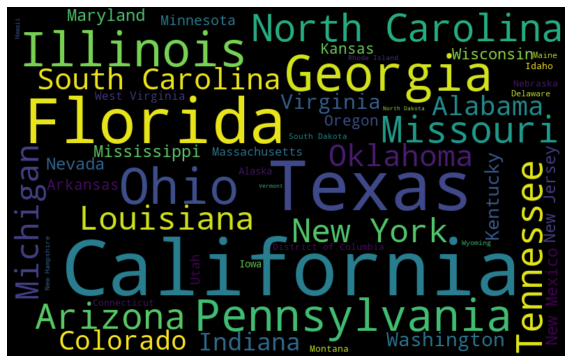

In [45]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110, max_words=51).generate_from_frequencies(elements_count)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Graph of Most common Unique incidents using the keyword

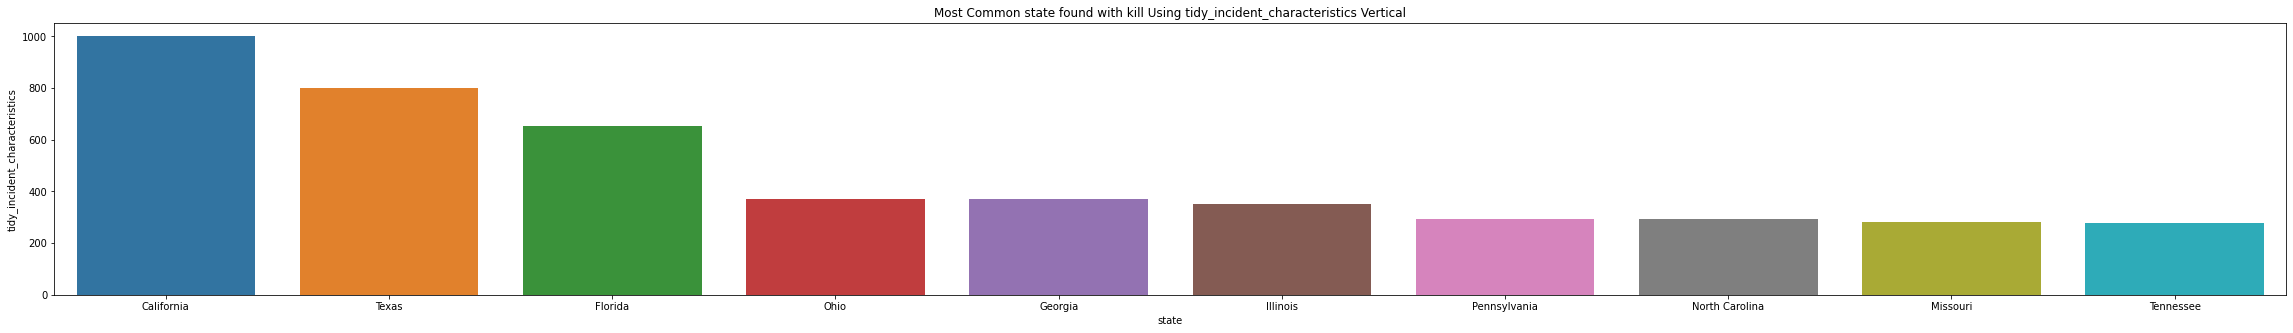

In [46]:
d = pd.DataFrame({FindFrequency: list(elements_count.keys()),StringToFind: list(elements_count.values())})  
d = d.nlargest(columns=StringToFind, n = 10) 
plt.figure(figsize=(40,5))
ax = sns.barplot(data=d, x= FindFrequency, y = StringToFind)
ax.set(ylabel = StringToFind)
ax.set_title("Most Common " + FindFrequency +" found with " + keyWordInPlace + " Using " + StringToFind + " Vertical")
plt.show()

Finding Number of Keyword Per Incident

In [47]:
tempName = keyWordInPlace + " Per Incident(Average)"
average = {}
num = 0
for i in not_null[FindFrequency]:
  if i in average:
    for j in new_find[num]:
      if j == keyWordInPlace:
        average[i] += 1
  else:
    average[i] = 1
  num += 1
tableForAverage = {k: str(round(average[k] / elements_count[k],5)) for k in elements_count if k in average}
df = pd.DataFrame(tableForAverage.items(), columns=[FindFrequency, tempName])
df.sort_values(by=[tempName])

,state,kill Per Incident(Average)
38,South Dakota,1.0
34,Rhode Island,1.0
39,Vermont,1.0
49,Wyoming,1.0
16,District of Columbia,1.0
45,Minnesota,1.0102
17,West Virginia,1.01471
10,New Jersey,1.01538
36,Iowa,1.01818
29,Maryland,1.02083
